# Data Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns  


## Import Data
The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/wendykan/lending-club-loan-data/version/1
We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

In [2]:
loan_data_backup = pd.read_csv(r'F:\Learning\CreditRiskModelingInPython\loan_data_2007_2014.csv', low_memory=False)

In [3]:
loan_data = loan_data_backup.copy()

In [4]:
print("The rows and columns in loan_data are: ", loan_data.shape)

The rows and columns in loan_data are:  (466285, 75)


## Explore Data

In [5]:
loan_data.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
5879,5879,978592,1201452,12800,12800,12800.0,60 months,12.69,289.22,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79865,79865,7697637,9399340,24000,24000,23950.0,60 months,12.99,545.96,B,...,NaN,NaN,NaN,NaN,NaN,NaN,53800.0,NaN,NaN,NaN
176976,176976,2825123,3407366,30750,30750,30750.0,60 months,19.05,798.52,D,...,NaN,NaN,NaN,NaN,NaN,NaN,25200.0,NaN,NaN,NaN
172419,172419,2896264,3528621,9900,9900,9900.0,36 months,12.12,329.39,B,...,NaN,NaN,NaN,NaN,NaN,NaN,13700.0,NaN,NaN,NaN
188522,188522,1690769,1973326,16800,16800,16525.0,60 months,12.12,374.73,B,...,NaN,NaN,NaN,NaN,NaN,NaN,87600.0,NaN,NaN,NaN


In [6]:
# Option 1:
pd.set_option("display.max_columns", None)

# Option 2:
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [7]:
loan_data.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
107814,107814,6207514,7689624,7250,7250,7250.0,36 months,13.68,246.67,C,C1,pearson construction,7 years,MORTGAGE,38000.0,Not Verified,Aug-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,one loan,491xx,MI,6.79,0.0,Feb-07,1.0,NaN,NaN,7.0,0.0,3249,32.5,11.0,f,1650.47,1650.47,7153.13000,7153.13,5599.53,1553.60,0.0,0.0,0.0,Jan-16,246.67,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,142331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,NaN,NaN,NaN
286296,286296,30295171,32838347,3000,3000,3000.0,36 months,14.99,103.99,C,C5,General Manager,3 years,RENT,185000.0,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Other,606xx,IL,2.78,0.0,Apr-00,1.0,NaN,NaN,5.0,0.0,13038,91.2,11.0,w,1910.13,1910.13,1553.60000,1553.60,1089.87,463.73,0.0,0.0,0.0,Jan-16,103.99,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,13067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14300.0,NaN,NaN,NaN
444489,444489,11707547,13679723,17000,17000,17000.0,36 months,14.98,589.15,C,C3,Teacher,10+ years,OWN,120000.0,Source Verified,Feb-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.17,1.0,Jun-96,0.0,4.0,NaN,16.0,0.0,26158,62.6,26.0,f,0.00,0.00,17820.40000,17820.40,17000.00,820.40,0.0,0.0,0.0,Jun-14,16052.95,NaN,Jan-16,0.0,28.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,232369.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41800.0,NaN,NaN,NaN
297133,297133,28704131,31237294,15000,15000,14975.0,36 months,6.49,459.67,A,A2,NaN,NaN,OWN,70000.0,Source Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,331xx,FL,6.74,0.0,Feb-74,1.0,NaN,NaN,8.0,0.0,12388,39.0,19.0,f,8516.83,8502.64,7459.67000,7447.24,6483.17,976.50,0.0,0.0,0.0,Jan-16,500.00,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,12388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31800.0,NaN,NaN,NaN
45732,45732,10135202,11987307,11500,11500,11475.0,36 months,12.85,386.66,B,B4,Case Manager,< 1 year,RENT,35000.0,Not Verified,Dec-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,consolidation,029xx,RI,12.76,1.0,Oct-99,1.0,14.0,NaN,12.0,0.0,11807,71.6,22.0,f,0.00,0.00,13188.26036,13159.59,11500.00,1688.26,0.0,0.0,0.0,Jun-15,7002.08,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,41672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16500.0,NaN,NaN,NaN


In [8]:
# Show the first five rows of the data set
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Display the last 5 rows of the dataset
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [10]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [11]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## General Preprocessing

### Preprocessing few continuous variables

In [12]:
loan_data['emp_length'].unique()
# Displays unique values of a column.

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

<Axes: ylabel='emp_length'>

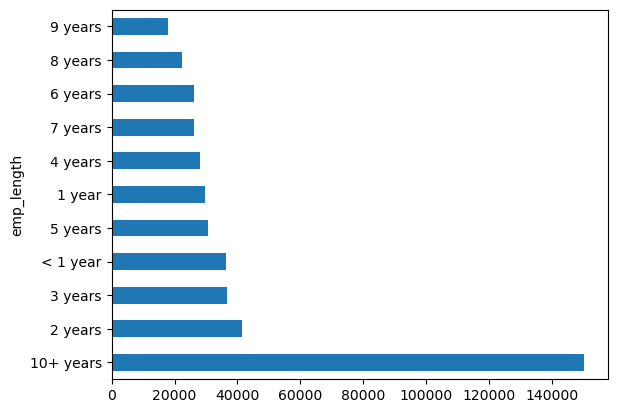

In [13]:
# We can also check the unique value with some plot our count of data

loan_data['emp_length'].value_counts().plot(kind='barh')

Problem with this is, it does not show the missing value

In [14]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
# We store the preprocessed ‘employment length’ variable in a new variable called ‘employment length int’,
# We assign the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’
# replaced with nothing. Next, we replace the whole string ‘less than 1 year’ with the string ‘0’.
# Then, we replace the ‘n/a’ string with the string ‘0’. Then, we replace the string ‘space years’ with nothing.
# Finally, we replace the string ‘space year’ with nothing.

In [15]:
# Check the unique value after the tranformation
loan_data['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

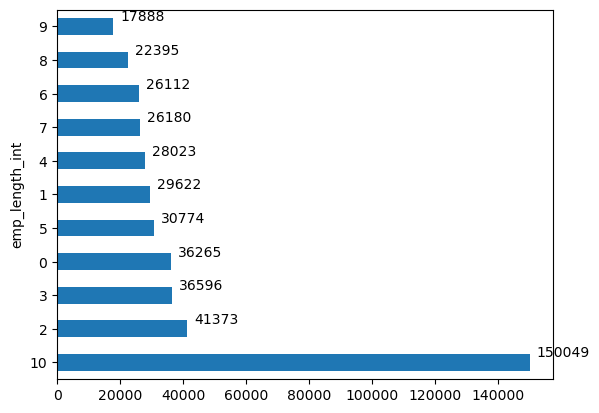

In [16]:
# Perhaps it is better if we can use value_count for this to know the distribution

ax = loan_data['emp_length_int'].value_counts().plot(kind = 'barh')

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

# Show the plot
plt.show()

Let us see the how many missing values we have

In [17]:
print(round(loan_data['emp_length_int'].isnull().sum()/len(loan_data) * 100,2),"% data missing in emp_lenght_int column which is", loan_data['emp_length_int'].isnull().sum(),"out of ", len(loan_data), "missing")

4.51 % data missing in emp_lenght_int column which is 21008 out of  466285 missing


We can see there is still nan in the data. Need to do something about it. I will assign 0 to it.

In [18]:
loan_data['emp_length_int'].fillna(str(0), inplace=True)

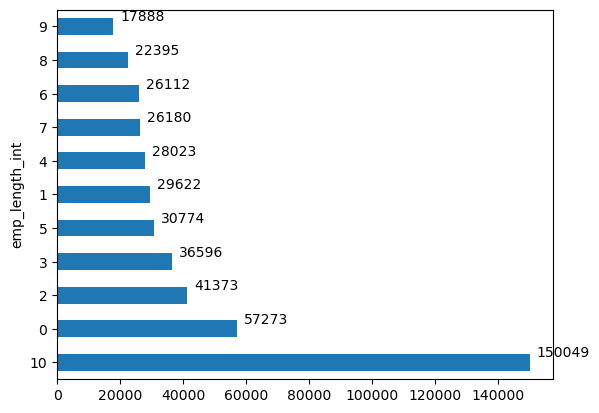

In [19]:
# Check again after the transformation and fill na step
# Create a horizontal bar chart
d = loan_data['emp_length_int']
ax = d.value_counts().plot(kind='barh')
# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

# Show the plot
plt.show()

We can see that nan is removed and is replace by 0

In [20]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

str

The data type was str

In [21]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
# Transforms the values to numeric.

In [22]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

Now the data type is integer

In [23]:
loan_data['earliest_cr_line'].value_counts()
# Displays a column.

earliest_cr_line
Oct-00    3674
Aug-00    3597
Aug-01    3455
Oct-99    3406
Oct-01    3329
          ... 
Jul-55       1
Feb-57       1
Oct-54       1
May-53       1
Nov-56       1
Name: count, Length: 664, dtype: int64

In [24]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.

In [25]:
loan_data['earliest_cr_line_date'].sample(5)

48201    1976-05-01
28221    1992-03-01
226477   1998-01-01
449335   1999-05-01
270428   1985-10-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [26]:
type(loan_data['earliest_cr_line_date'][0])
# Checks the datatype of a single element of a column.

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']
# Calculates the difference between two dates and times.

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [28]:
# Any date which is greater then 2017-12-01 is incorrect and so we should replace the first two digitis of the year from 20 to 19

loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line_date'].apply(lambda x: x.replace(year=x.year - 100) if x.year > 2017 else x)

In [29]:
"""
# Assume we are now in December 2017
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.

Since np.timedelta64 do not support M anymore we have to do it differently
"""

"\n# Assume we are now in December 2017\nloan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))\n# We calculate the difference between two dates in months, turn it to numeric datatype and round it.\n# We save the result in a new variable.\n\nSince np.timedelta64 do not support M anymore we have to do it differently\n"

In [30]:
from dateutil.relativedelta import relativedelta

def calculate_months_difference(x):
    try:
        diff = relativedelta(pd.to_datetime('2017-12-01'), x)
        months_diff = diff.years * 12 + diff.months
        return months_diff
    except Exception as e:
        return None  # Handle cases where the date conversion or calculation fails

# Assuming you have a DataFrame with a column 'earliest_cr_line_date' containing datetime values
loan_data['mths_since_earliest_cr_line'] = loan_data['earliest_cr_line_date'].apply(calculate_months_difference)

# Option 1:
# Drop rows where the calculation failed (result is None)

loan_data = loan_data.dropna(subset=['mths_since_earliest_cr_line'])

# Option 2:
# We can also fill something there to check further
#loan_data['mths_since_earliest_cr_line'].fillna(pd.to_datetime('1900-01-01'), inplace = True)

# Round the result if needed
loan_data['mths_since_earliest_cr_line'] = loan_data['mths_since_earliest_cr_line'].round()

In [31]:
loan_data['mths_since_earliest_cr_line'].describe()
# Shows some descriptive statisics for the values of a column.
# Dates from 1969 and before are not being converted well, i.e., they have become 2069 and similar,
# and negative differences are being calculated.

count    466256.000000
mean        242.491078
std          86.928944
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [32]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]
# We take three columns from the dataframe. Then, we display them only for the rows where a variable has negative value.
# There are 2303 strange negative values.

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line


In [33]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()
# We set the rows that had negative differences to the maximum value.

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_19272\653136197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


In [34]:
min(loan_data['mths_since_earliest_cr_line'])
# Calculates and shows the minimum value of a column.

73.0

### Homework

In [35]:
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466256, dtype: object

In [36]:
loan_data['term'].describe()
# Shows some descriptive statisics for the values of a column.

count         466256
unique             2
top        36 months
freq          337924
Name: term, dtype: object

In [37]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
# We replace a string with another string, in this case, with an empty strng (i.e. with nothing).

In [38]:
loan_data['term_int']

0          36
1          60
2          36
3          36
4          60
         ... 
466280     60
466281     60
466282     60
466283     36
466284     36
Name: term_int, Length: 466256, dtype: object

In [39]:
type(loan_data['term_int'][25])
# Checks the datatype of a single element of a column.

str

In [40]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466256, dtype: int64

In [41]:
type(loan_data['term_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

In [42]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466256, dtype: object

In [43]:
# Assume we are now in December 2017
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')


In [44]:
loan_data['issue_d_date'].value_counts() 

issue_d_date
2014-10-01    38782
2014-07-01    29306
2014-11-01    25054
2014-05-01    19099
2014-04-01    19071
              ...  
2007-08-01       70
2007-07-01       59
2008-09-01       57
2007-09-01       53
2007-06-01        3
Name: count, Length: 91, dtype: int64

In [45]:
def calculate_months_difference(x):
    try:
        diff = relativedelta(pd.to_datetime('2017-12-01'), x)
        months_diff = diff.years * 12 + diff.months
        return months_diff
    except Exception as e:
        return None  # Handle cases where the date conversion or calculation fails

# Assuming you have a DataFrame with a column 'earliest_cr_line_date' containing datetime values
loan_data['mths_since_issue_d'] = loan_data['issue_d_date'].apply(calculate_months_difference)

# Drop rows where the calculation failed (result is None)
loan_data = loan_data.dropna(subset=['mths_since_issue_d'])

# Round the result if needed
loan_data['mths_since_issue_d'] = loan_data['mths_since_issue_d'].round()

In [46]:
# # Extracts the date and the time from a string variable that is in a given format.
# loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
# # We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# # We save the result in a new variable.
# loan_data['mths_since_issue_d'].describe()
# # Shows some descriptive statisics for the values of a column.

In [47]:
# We save the result in a new variable.
loan_data['mths_since_issue_d'].describe()
# Shows some descriptive statisics for the values of a column.

count    466256.000000
mean         51.250564
std          14.328612
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [48]:
loan_data.loc[:,['issue_d','issue_d_date','mths_since_issue_d']].sample(10)

,issue_d,issue_d_date,mths_since_issue_d
166351,Feb-13,2013-02-01,58
299985,Oct-14,2014-10-01,38
347995,Jul-14,2014-07-01,41
85798,Oct-13,2013-10-01,50
2306,Dec-11,2011-12-01,72
383779,Jun-14,2014-06-01,42
93768,Sep-13,2013-09-01,51
35696,Aug-09,2009-08-01,100
129533,Jun-13,2013-06-01,54
377810,Jun-14,2014-06-01,42


### Preprocessing few discrete variables

In [49]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
Index: 466256 entries, 0 to 466284
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466256 non-null  int64         
 1   id                           466256 non-null  int64         
 2   member_id                    466256 non-null  int64         
 3   loan_amnt                    466256 non-null  int64         
 4   funded_amnt                  466256 non-null  int64         
 5   funded_amnt_inv              466256 non-null  float64       
 6   term                         466256 non-null  object        
 7   int_rate                     466256 non-null  float64       
 8   installment                  466256 non-null  float64       
 9   grade                        466256 non-null  object        
 10  sub_grade                    466256 non-null  object        
 11  emp_title                    43

We are going to preprocess the following discrete variables: grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status. Most likely, we are not going to use sub_grade, as it overlaps with grade.

In [50]:
pd.get_dummies(loan_data['grade'])
# Create dummy variables from a variable.

,A,B,C,D,E,F,G
0,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
466280,False,False,True,False,False,False,False
466281,False,False,False,True,False,False,False
466282,False,False,False,True,False,False,False
466283,True,False,False,False,False,False,False


In [51]:
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')
# Create dummy variables from a variable.

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
466280,False,False,True,False,False,False,False
466281,False,False,False,True,False,False,False
466282,False,False,False,True,False,False,False
466283,True,False,False,False,False,False,False


In [52]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]
# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.

In [53]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
# We concatenate the dummy variables and this turns them into a dataframe.

In [54]:
type(loan_data_dummies)
# Returns the type of the variable.

pandas.core.frame.DataFrame

In [55]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)
# Concatenates two dataframes.
# Here we concatenate the dataframe with original data with the dataframe with dummy variables, along the columns. 

In [56]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

### Working with Missing Values

In [57]:
loan_data.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [58]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466256 entries, 0 to 466284
Columns: 207 entries, Unnamed: 0 to initial_list_status:w
dtypes: bool(126), datetime64[ns](2), float64(47), int64(10), object(22)
memory usage: 363.8+ MB


In [59]:
pd.set_option('display.max_rows', None)
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27576
emp_length                                                          21008
home_ownership                        

In [60]:
pd.set_option('display.max_rows', 100)

In [61]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [62]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [63]:
loan_data['total_rev_hi_lim'].sample(5)

385672    41300.0
221264    15000.0
387802    22700.0
231129    30700.0
183832    40800.0
Name: total_rev_hi_lim, dtype: float64

In [64]:
loan_data['annual_inc'].isnull().sum()

0

In [65]:
loan_data['emp_title'].describe()

count      438680
unique     205461
top       Teacher
freq         5399
Name: emp_title, dtype: object

In [66]:
loan_data['emp_title'].value_counts()

emp_title
Teacher                                     5399
Manager                                     4438
Registered Nurse                            2316
RN                                          2204
Supervisor                                  1967
                                            ... 
North SHore Med Center                         1
 Bunge North America                           1
Williamsburg Paint & Floor Coverings, In       1
Pursuant                                       1
Server Engineer Lead                           1
Name: count, Length: 205461, dtype: int64

Since it has many unique categories we can remove it from our model

In [67]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

We can drop this column as we have created a integer column for this

In [68]:
loan_data['desc'].sample(5)

63310       Borrower added on 11/11/13 > I intend to use...
129960                                                  NaN
380427                                                  NaN
330004                                                  NaN
242746                                                  NaN
Name: desc, dtype: object

In [69]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

# PD model

## Data preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [70]:
loan_data['loan_status'].unique()
# Displays unique values of a column.

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [71]:
loan_data['loan_status'].value_counts()
# Calculates the number of observations for each unique value of a variable.

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1962
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       758
Name: count, dtype: int64

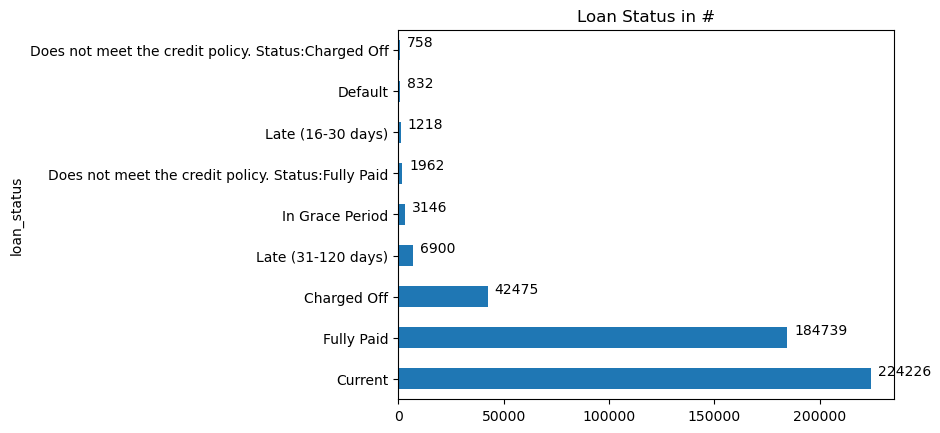

In [72]:
ax = loan_data['loan_status'].value_counts().plot(kind='barh')

for p in ax.patches:
        ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

# Show the plot
plt.title("Loan Status in #")
plt.show()
    

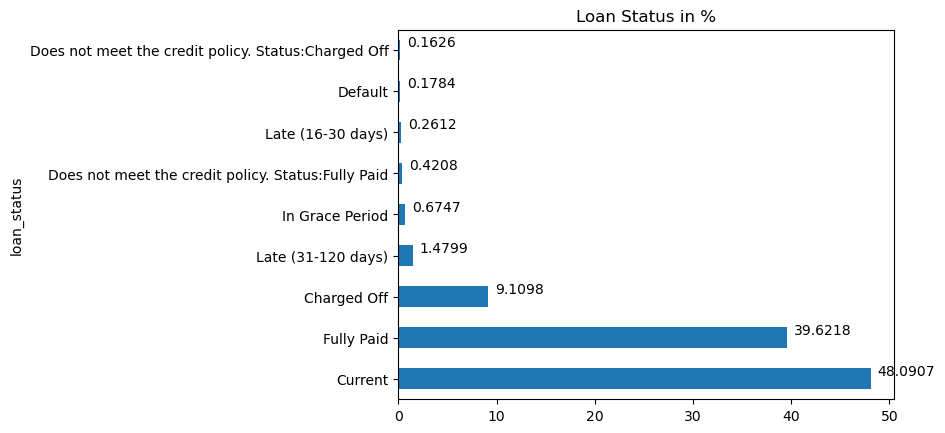

In [73]:
ax = (round(loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()*100, 4)).plot(kind = 'barh')
# We divide the number of observations for each unique value of a variable by the total number of observations.
# Thus, we get the proportion of observations for each unique value of a variable.
for p in ax.patches:
        ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

# Show the plot
plt.title("Loan Status in %")
plt.show()

In [74]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

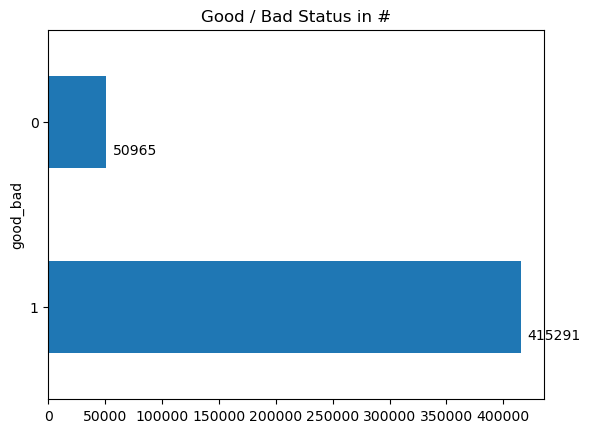

In [75]:
ax = loan_data['good_bad'].value_counts().plot(kind='barh')

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')
    
plt.title("Good / Bad Status in #")
plt.show()
    

We have selected `Good` as `1` and `bad` as `0`

### Splitting Data

In [76]:
from sklearn.model_selection import train_test_split
# Imports the libraries we need.

In [77]:
train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 128348      128348   5764656    7196808      15300        15300   
 389193      389193  16201265   18303764      12000        12000   
 244955      244955  32218401   34831584      24000        24000   
 26966        26966    557688     718010       3050         3050   
 308812      308812  27149726   29662788       8400         8400   
 ...            ...       ...        ...        ...          ...   
 371529      371529  18825126   20997834       3600         3600   
 234225      234225  36048503   38760055       7500         7500   
 22835        22835    613943     787105      14500        14500   
 436472      436472  12515594   14527738      18175        18175   
 133296      133296   5535171    6907344      25000        25000   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 128348          15250.0   36 months     12.12       509.06     B        B3   
 389193          12000.0

In [78]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size=0.2, random_state=42)
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
# This time we set the size of the test dataset to be 20%.
# Respectively, the size of the train dataset becomes 80%.
# We also set a specific random state.
# This would allow us to perform the exact same split multimple times.
# This means, to assign the exact same observations to the train and test datasets.

In [79]:
print("The rows and columns of loan_data_inputs_train :\t", loan_data_inputs_train.shape)
print("The rows and columns of loan_data_inputs_test :\t", loan_data_inputs_test.shape)
print("The rows and columns of loan_data_targets_train:\t", loan_data_targets_train.shape)
print("The rows and columns of loan_data_targets_test: \t", loan_data_targets_test.shape)

The rows and columns of loan_data_inputs_train :	 (373004, 207)
The rows and columns of loan_data_inputs_test :	 (93252, 207)
The rows and columns of loan_data_targets_train:	 (373004,)
The rows and columns of loan_data_targets_test: 	 (93252,)


### Data Preparation: An Example

In [80]:
#####
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train
#####
# df_inputs_prepr = loan_data_inputs_test
# df_targets_prepr = loan_data_targets_test

In [81]:
df_inputs_prepr['grade'].unique()
# Displays unique values of a column.

array(['B', 'D', 'F', 'A', 'C', 'E', 'G'], dtype=object)

In [82]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
# Concatenates two dataframes along the columns.
df1.head()

,grade,good_bad
431128,B,1
413015,D,1
90236,F,1
122060,B,1
41491,B,1


In [83]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# In this specific case, we group by the column with index 0 and we aggregate the values of the column with index 1.
# More specifically, we count them.
# In other words, we count the values in the column with index 1 for each value of the column with index 0.

,grade,good_bad
0,A,59873
1,B,109526
2,C,100106
3,D,61537
4,E,28753
5,F,10565
6,G,2644


In [84]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# Here we calculate the mean of the values in the column with index 1 for each value of the column with index 0.

,grade,good_bad
0,A,0.961619
1,B,0.921224
2,C,0.885222
3,D,0.845199
4,E,0.804507
5,F,0.759016
6,G,0.729955


In [85]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.

In [86]:
df1

,grade,good_bad,grade,good_bad
0,A,59873,A,0.961619
1,B,109526,B,0.921224
2,C,100106,C,0.885222
3,D,61537,D,0.845199
4,E,28753,E,0.804507
5,F,10565,F,0.759016
6,G,2644,G,0.729955


In [87]:
df1 = df1.iloc[:, [0, 1, 3]]
# Selects only columns with specific indexes.
df1

,grade,good_bad,good_bad
0,A,59873,0.961619
1,B,109526,0.921224
2,C,100106,0.885222
3,D,61537,0.845199
4,E,28753,0.804507
5,F,10565,0.759016
6,G,2644,0.729955


In [88]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
df1

,grade,n_obs,prop_good
0,A,59873,0.961619
1,B,109526,0.921224
2,C,100106,0.885222
3,D,61537,0.845199
4,E,28753,0.804507
5,F,10565,0.759016
6,G,2644,0.729955


In [89]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59873,0.961619,0.160516
1,B,109526,0.921224,0.293632
2,C,100106,0.885222,0.268378
3,D,61537,0.845199,0.164977
4,E,28753,0.804507,0.077085
5,F,10565,0.759016,0.028324
6,G,2644,0.729955,0.007088


In [90]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59873,0.961619,0.160516,57575.0,2298.0
1,B,109526,0.921224,0.293632,100898.0,8628.0
2,C,100106,0.885222,0.268378,88616.0,11490.0
3,D,61537,0.845199,0.164977,52011.0,9526.0
4,E,28753,0.804507,0.077085,23132.0,5621.0
5,F,10565,0.759016,0.028324,8019.0,2546.0
6,G,2644,0.729955,0.007088,1930.0,714.0


In [91]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59873,0.961619,0.160516,57575.0,2298.0,0.173324,0.056292
1,B,109526,0.921224,0.293632,100898.0,8628.0,0.303744,0.211351
2,C,100106,0.885222,0.268378,88616.0,11490.0,0.266770,0.281459
3,D,61537,0.845199,0.164977,52011.0,9526.0,0.156574,0.233349
4,E,28753,0.804507,0.077085,23132.0,5621.0,0.069637,0.137692
5,F,10565,0.759016,0.028324,8019.0,2546.0,0.024140,0.062367
6,G,2644,0.729955,0.007088,1930.0,714.0,0.005810,0.017490


In [92]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59873,0.961619,0.160516,57575.0,2298.0,0.173324,0.056292,1.124615
1,B,109526,0.921224,0.293632,100898.0,8628.0,0.303744,0.211351,0.362663
2,C,100106,0.885222,0.268378,88616.0,11490.0,0.266770,0.281459,-0.053599
3,D,61537,0.845199,0.164977,52011.0,9526.0,0.156574,0.233349,-0.399004
4,E,28753,0.804507,0.077085,23132.0,5621.0,0.069637,0.137692,-0.681727
5,F,10565,0.759016,0.028324,8019.0,2546.0,0.024140,0.062367,-0.949144
6,G,2644,0.729955,0.007088,1930.0,714.0,0.005810,0.017490,-1.102042


In [93]:
df1 = df1.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
df1 = df1.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2644,0.729955,0.007088,1930.0,714.0,0.005810,0.017490,-1.102042
1,F,10565,0.759016,0.028324,8019.0,2546.0,0.024140,0.062367,-0.949144
2,E,28753,0.804507,0.077085,23132.0,5621.0,0.069637,0.137692,-0.681727
3,D,61537,0.845199,0.164977,52011.0,9526.0,0.156574,0.233349,-0.399004
4,C,100106,0.885222,0.268378,88616.0,11490.0,0.266770,0.281459,-0.053599
5,B,109526,0.921224,0.293632,100898.0,8628.0,0.303744,0.211351,0.362663
6,A,59873,0.961619,0.160516,57575.0,2298.0,0.173324,0.056292,1.124615


In [94]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1['diff_WoE'] = df1['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2644,0.729955,0.007088,1930.0,714.0,0.005810,0.017490,-1.102042,NaN,NaN
1,F,10565,0.759016,0.028324,8019.0,2546.0,0.024140,0.062367,-0.949144,0.029061,0.152898
2,E,28753,0.804507,0.077085,23132.0,5621.0,0.069637,0.137692,-0.681727,0.045492,0.267417
3,D,61537,0.845199,0.164977,52011.0,9526.0,0.156574,0.233349,-0.399004,0.040691,0.282723
4,C,100106,0.885222,0.268378,88616.0,11490.0,0.266770,0.281459,-0.053599,0.040023,0.345405
5,B,109526,0.921224,0.293632,100898.0,8628.0,0.303744,0.211351,0.362663,0.036003,0.416262
6,A,59873,0.961619,0.160516,57575.0,2298.0,0.173324,0.056292,1.124615,0.040395,0.761952


In [95]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
# We sum all values of a given column.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2644,0.729955,0.007088,1930.0,714.0,0.005810,0.017490,-1.102042,NaN,NaN,0.292094
1,F,10565,0.759016,0.028324,8019.0,2546.0,0.024140,0.062367,-0.949144,0.029061,0.152898,0.292094
2,E,28753,0.804507,0.077085,23132.0,5621.0,0.069637,0.137692,-0.681727,0.045492,0.267417,0.292094
3,D,61537,0.845199,0.164977,52011.0,9526.0,0.156574,0.233349,-0.399004,0.040691,0.282723,0.292094
4,C,100106,0.885222,0.268378,88616.0,11490.0,0.266770,0.281459,-0.053599,0.040023,0.345405,0.292094
5,B,109526,0.921224,0.293632,100898.0,8628.0,0.303744,0.211351,0.362663,0.036003,0.416262,0.292094
6,A,59873,0.961619,0.160516,57575.0,2298.0,0.173324,0.056292,1.124615,0.040395,0.761952,0.292094


### Preprocessing Discrete Variables: Automating Calculaions

In [96]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [97]:
# 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2644,0.729955,0.007088,1930.0,714.0,0.005810,0.017490,-1.102042,NaN,NaN,0.292094
1,F,10565,0.759016,0.028324,8019.0,2546.0,0.024140,0.062367,-0.949144,0.029061,0.152898,0.292094
2,E,28753,0.804507,0.077085,23132.0,5621.0,0.069637,0.137692,-0.681727,0.045492,0.267417,0.292094
3,D,61537,0.845199,0.164977,52011.0,9526.0,0.156574,0.233349,-0.399004,0.040691,0.282723,0.292094
4,C,100106,0.885222,0.268378,88616.0,11490.0,0.266770,0.281459,-0.053599,0.040023,0.345405,0.292094
5,B,109526,0.921224,0.293632,100898.0,8628.0,0.303744,0.211351,0.362663,0.036003,0.416262,0.292094
6,A,59873,0.961619,0.160516,57575.0,2298.0,0.173324,0.056292,1.124615,0.040395,0.761952,0.292094


### Preprocessing Discrete Variables: Visualizing Results

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports the libraries we need.
sns.set()
# We set the default style of the graphs to the seaborn style. 

In [99]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.

def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title('Weight of Evidence by ' + df_WoE.columns[0])
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    
    for i, j in zip(x, y):
        plt.annotate(f'{j:.2f}', (i, j), textcoords='offset points', xytext=(0, 10), ha='center')
    # put the values of weight of evidence against each data coordinates
    
    plt.xticks(rotation=rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.
    plt.show()

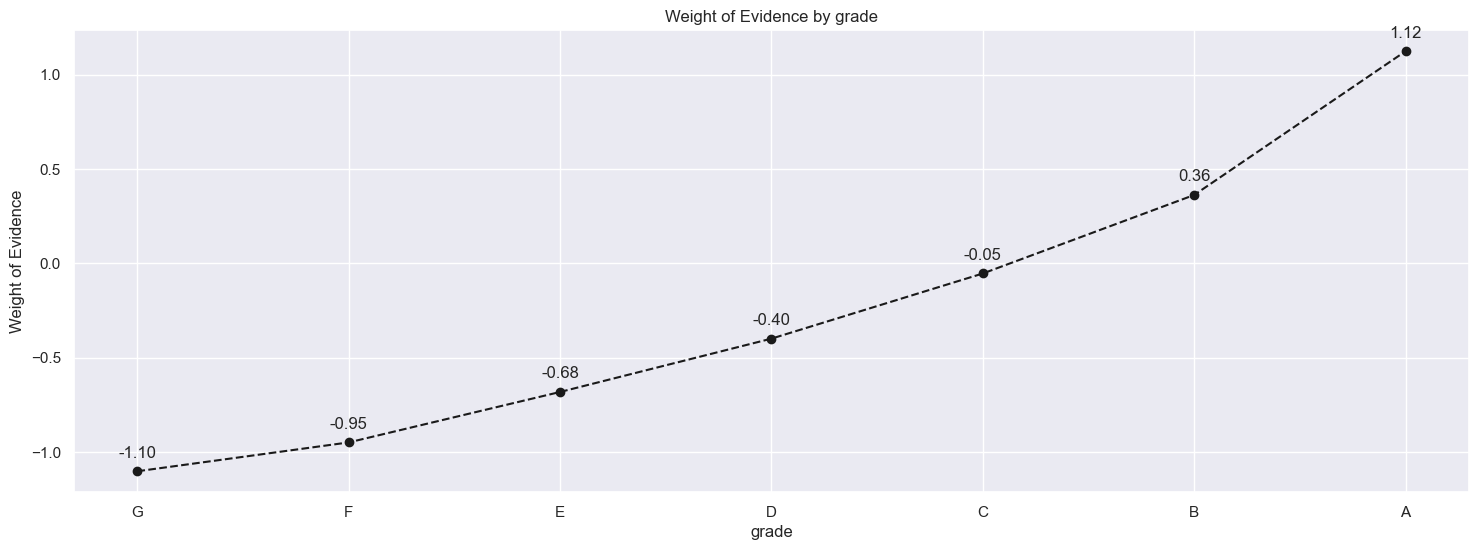

In [100]:
plot_by_woe(df_temp)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [101]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.788321,0.000367,108.0,29.0,0.000325,0.000710,-0.781599,NaN,NaN,0.022167
1,NONE,36,0.861111,0.000097,31.0,5.0,0.000093,0.000122,-0.271885,0.072790,0.509714,0.022167
2,RENT,150709,0.873644,0.404041,131666.0,19043.0,0.396368,0.466477,-0.162866,0.012533,0.109020,0.022167
3,OWN,33338,0.890455,0.089377,29686.0,3652.0,0.089367,0.089459,-0.001034,0.016811,0.161832,0.022167
4,MORTGAGE,188784,0.904155,0.506118,170690.0,18094.0,0.513846,0.443231,0.147834,0.013700,0.148868,0.022167


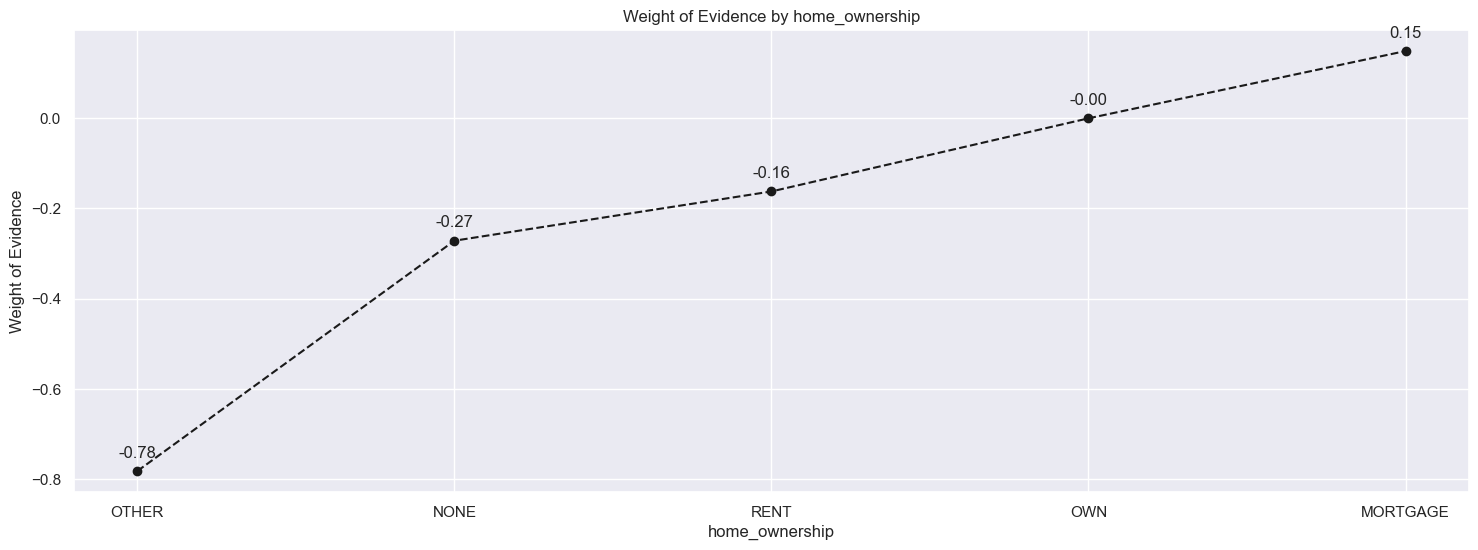

In [102]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [103]:
# There are many categories with very few observations and many categories with very different "good" %.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# 'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.

df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])
# 'RENT_OTHER_NONE_ANY' will be the reference category.

# Alternatively:
#loan_data.loc['home_ownership' in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 1
#loan_data.loc['home_ownership' not in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 0
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 1
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 0
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 1
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 0

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [104]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()


array(['TX', 'VA', 'AZ', 'NJ', 'IL', 'RI', 'NY', 'PA', 'OH', 'CA', 'WI',
       'AR', 'MN', 'UT', 'LA', 'OK', 'FL', 'HI', 'AL', 'IN', 'NC', 'MA',
       'KY', 'KS', 'NV', 'MI', 'OR', 'SC', 'CT', 'TN', 'GA', 'MO', 'VT',
       'WA', 'WV', 'CO', 'MD', 'AK', 'NM', 'MT', 'DC', 'NH', 'MS', 'DE',
       'SD', 'WY', 'IA', 'ID', 'NE', 'ME'], dtype=object)

In [105]:
print("The total unique states are:\t", len(df_inputs_prepr['addr_state'].unique()))

The total unique states are:	 50


In [106]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,12,0.500000,0.000032,6.0,6.0,0.000018,0.000147,-2.096434,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000073,-0.892462,0.269231,1.203973,inf
2,NV,5203,0.862387,0.013949,4487.0,716.0,0.013508,0.017539,-0.261175,0.093156,0.631287,inf
3,HI,1987,0.869653,0.005327,1728.0,259.0,0.005202,0.006344,-0.198542,0.007266,0.062632,inf
4,FL,25358,0.874872,0.067983,22185.0,3173.0,0.066786,0.077726,-0.151695,0.005219,0.046847,inf
5,AL,4747,0.875922,0.012726,4158.0,589.0,0.012517,0.014428,-0.142071,0.001050,0.009624,inf
6,NM,2071,0.879285,0.005552,1821.0,250.0,0.005482,0.006124,-0.110754,0.003364,0.031317,inf
7,LA,4355,0.882893,0.011675,3845.0,510.0,0.011575,0.012493,-0.076316,0.003608,0.034438,inf
8,NY,32111,0.883031,0.086088,28355.0,3756.0,0.085360,0.092007,-0.074986,0.000138,0.001331,inf
9,OK,3261,0.884085,0.008743,2883.0,378.0,0.008679,0.009259,-0.064742,0.001054,0.010244,inf


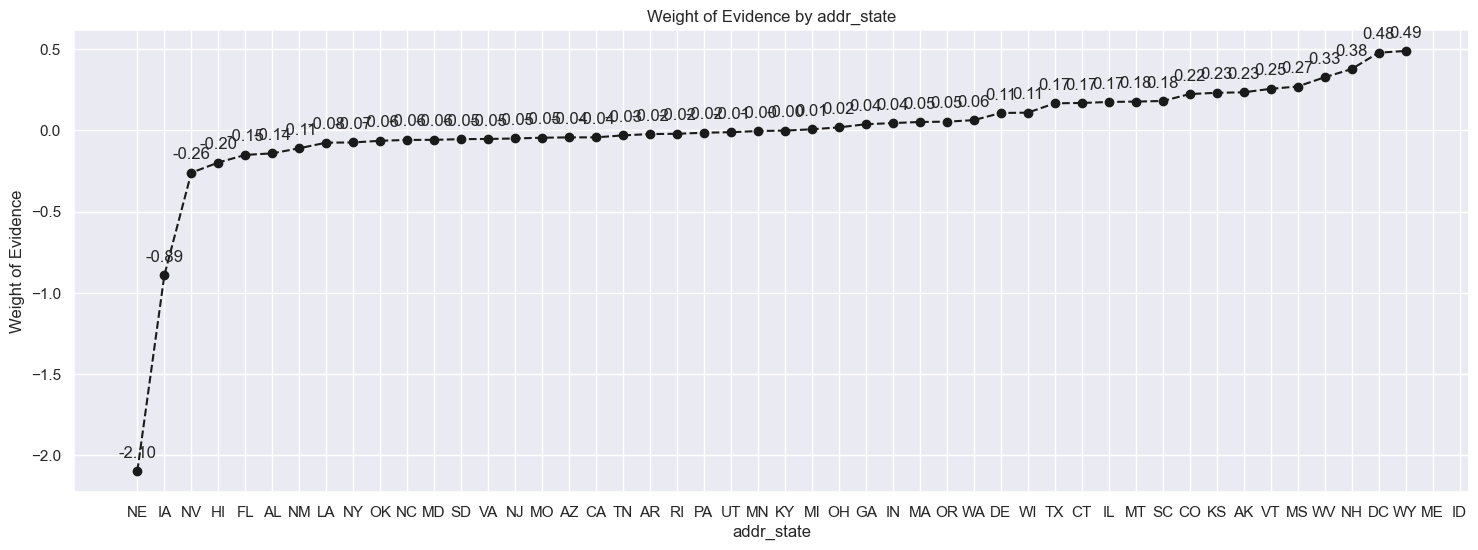

In [107]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [108]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [109]:
df_temp.iloc[2: -2, : ]

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
2,NV,5203,0.862387,0.013949,4487.0,716.0,0.013508,0.017539,-0.261175,0.093156,0.631287,inf
3,HI,1987,0.869653,0.005327,1728.0,259.0,0.005202,0.006344,-0.198542,0.007266,0.062632,inf
4,FL,25358,0.874872,0.067983,22185.0,3173.0,0.066786,0.077726,-0.151695,0.005219,0.046847,inf
5,AL,4747,0.875922,0.012726,4158.0,589.0,0.012517,0.014428,-0.142071,0.001050,0.009624,inf
6,NM,2071,0.879285,0.005552,1821.0,250.0,0.005482,0.006124,-0.110754,0.003364,0.031317,inf
7,LA,4355,0.882893,0.011675,3845.0,510.0,0.011575,0.012493,-0.076316,0.003608,0.034438,inf
8,NY,32111,0.883031,0.086088,28355.0,3756.0,0.085360,0.092007,-0.074986,0.000138,0.001331,inf
9,OK,3261,0.884085,0.008743,2883.0,378.0,0.008679,0.009259,-0.064742,0.001054,0.010244,inf
10,NC,10184,0.884623,0.027303,9009.0,1175.0,0.027121,0.028783,-0.059478,0.000538,0.005263,inf
11,MD,8784,0.884677,0.023549,7771.0,1013.0,0.023394,0.024814,-0.058952,0.000054,0.000527,inf


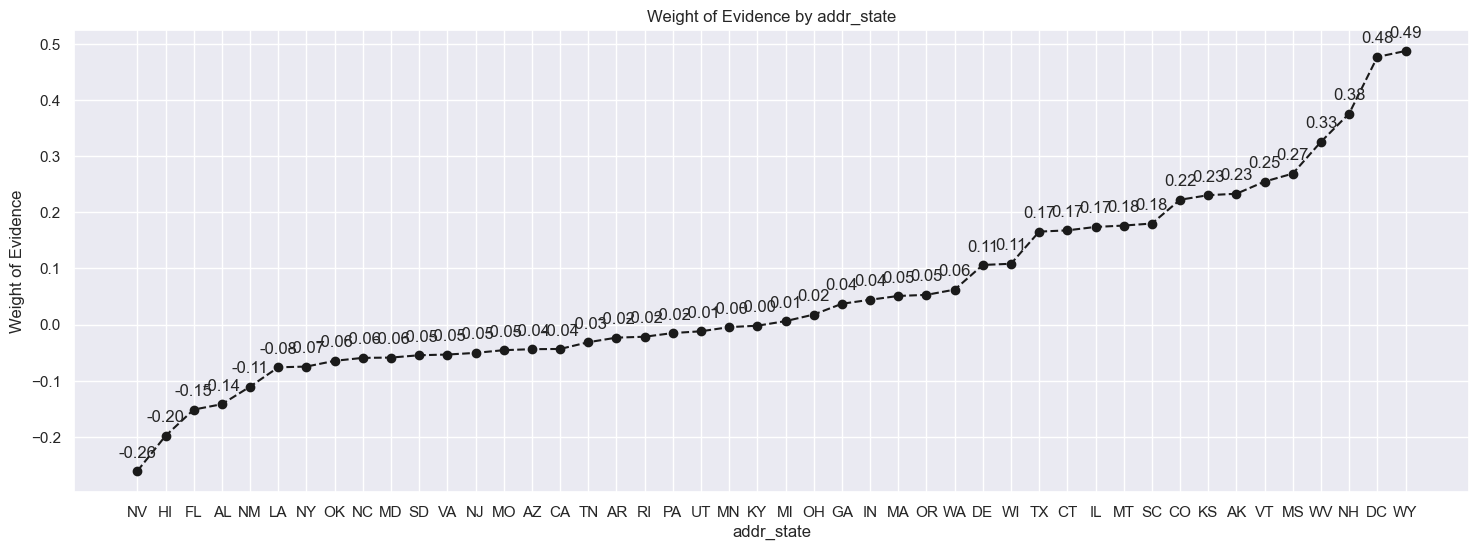

In [110]:
plot_by_woe(df_temp.iloc[2: -2, : ])
# We plot the weight of evidence values.

In [111]:
df_temp.iloc[6: -6, : ]

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
6,NM,2071,0.879285,0.005552,1821.0,250.0,0.005482,0.006124,-0.110754,0.003364,0.031317,inf
7,LA,4355,0.882893,0.011675,3845.0,510.0,0.011575,0.012493,-0.076316,0.003608,0.034438,inf
8,NY,32111,0.883031,0.086088,28355.0,3756.0,0.085360,0.092007,-0.074986,0.000138,0.001331,inf
9,OK,3261,0.884085,0.008743,2883.0,378.0,0.008679,0.009259,-0.064742,0.001054,0.010244,inf
10,NC,10184,0.884623,0.027303,9009.0,1175.0,0.027121,0.028783,-0.059478,0.000538,0.005263,inf
11,MD,8784,0.884677,0.023549,7771.0,1013.0,0.023394,0.024814,-0.058952,0.000054,0.000527,inf
12,SD,792,0.885101,0.002123,701.0,91.0,0.002110,0.002229,-0.054786,0.000424,0.004166,inf
13,VA,11440,0.885227,0.030670,10127.0,1313.0,0.030486,0.032163,-0.053544,0.000126,0.001242,inf
14,NJ,14309,0.885527,0.038362,12671.0,1638.0,0.038145,0.040124,-0.050594,0.000299,0.002949,inf
15,MO,6036,0.886017,0.016182,5348.0,688.0,0.016100,0.016853,-0.045745,0.000491,0.004849,inf


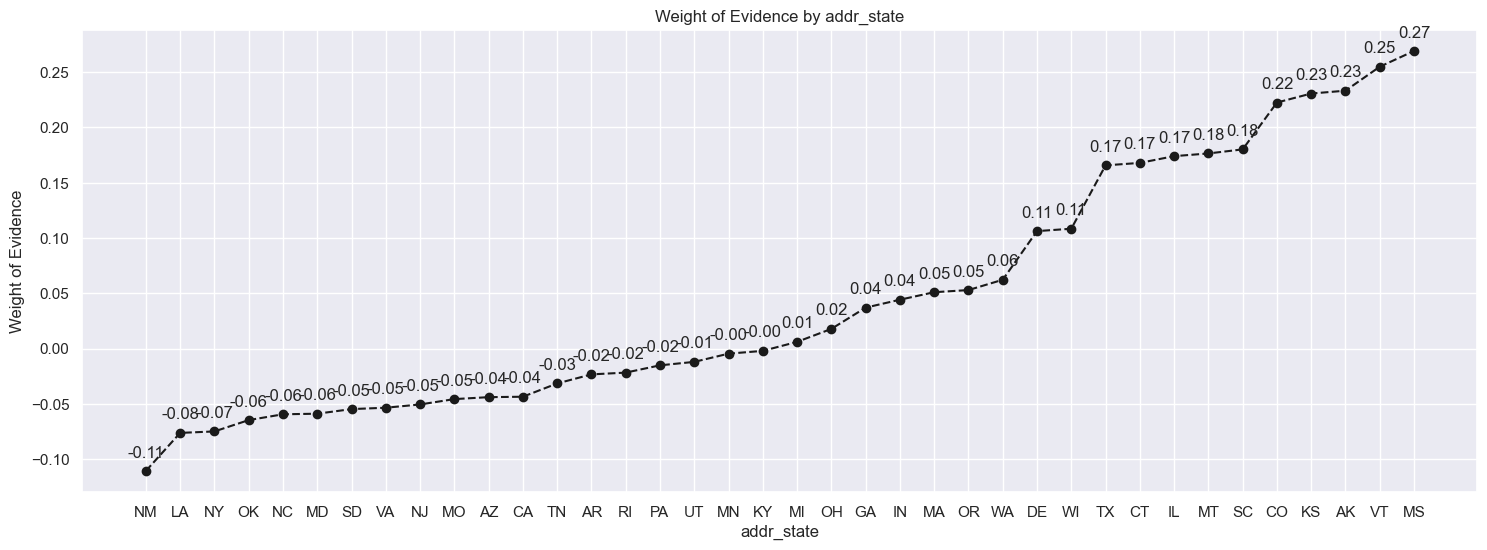

In [112]:
plot_by_woe(df_temp.iloc[6: -6, : ])
# We plot the weight of evidence values.

In [113]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [114]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134479,0.872605,0.360530,117347.0,17132.0,0.353262,0.419665,-0.172247,NaN,NaN,0.020585
1,Source Verified,119926,0.895661,0.321514,107413.0,12513.0,0.323357,0.306518,0.053479,0.023056,0.225726,0.020585
2,Not Verified,118599,0.905750,0.317956,107421.0,11178.0,0.323381,0.273816,0.166374,0.010089,0.112895,0.020585


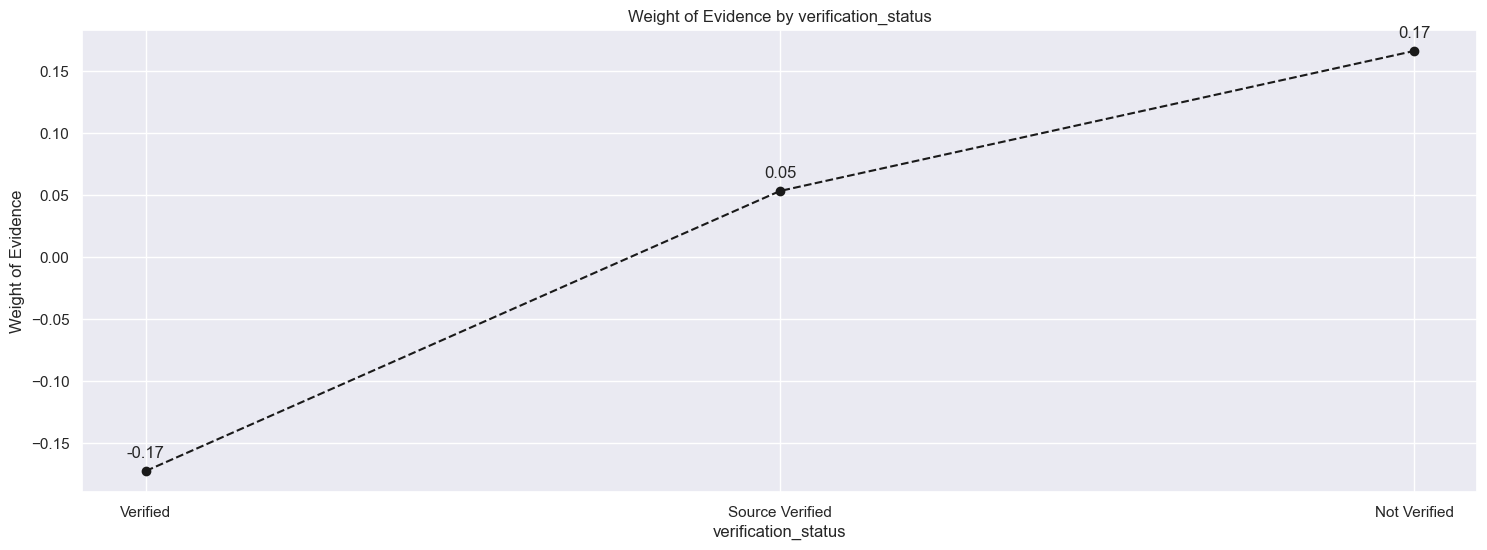

In [115]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [121]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5617,0.783692,0.015059,4402.0,1215.0,0.013252,0.029763,-0.809119,NaN,NaN,0.037671
1,educational,332,0.804217,0.000890,267.0,65.0,0.000804,0.001592,-0.683573,0.020525,0.125546,0.037671
2,moving,2382,0.848866,0.006386,2022.0,360.0,0.006087,0.008819,-0.370696,0.044650,0.312877,0.037671
3,renewable_energy,288,0.850694,0.000772,245.0,43.0,0.000738,0.001053,-0.356376,0.001828,0.014320,0.037671
4,house,1795,0.859610,0.004812,1543.0,252.0,0.004645,0.006173,-0.284380,0.008916,0.071997,0.037671
5,other,18979,0.861584,0.050881,16352.0,2627.0,0.049226,0.064351,-0.267927,0.001974,0.016453,0.037671
6,medical,3679,0.865181,0.009863,3183.0,496.0,0.009582,0.012150,-0.237431,0.003597,0.030496,0.037671
7,wedding,1889,0.878242,0.005064,1659.0,230.0,0.004994,0.005634,-0.120543,0.013062,0.116887,0.037671
8,debt_consolidation,219203,0.886256,0.587669,194270.0,24933.0,0.584832,0.610759,-0.043378,0.008014,0.077166,0.037671
9,vacation,1987,0.886764,0.005327,1762.0,225.0,0.005304,0.005512,-0.038330,0.000508,0.005048,0.037671


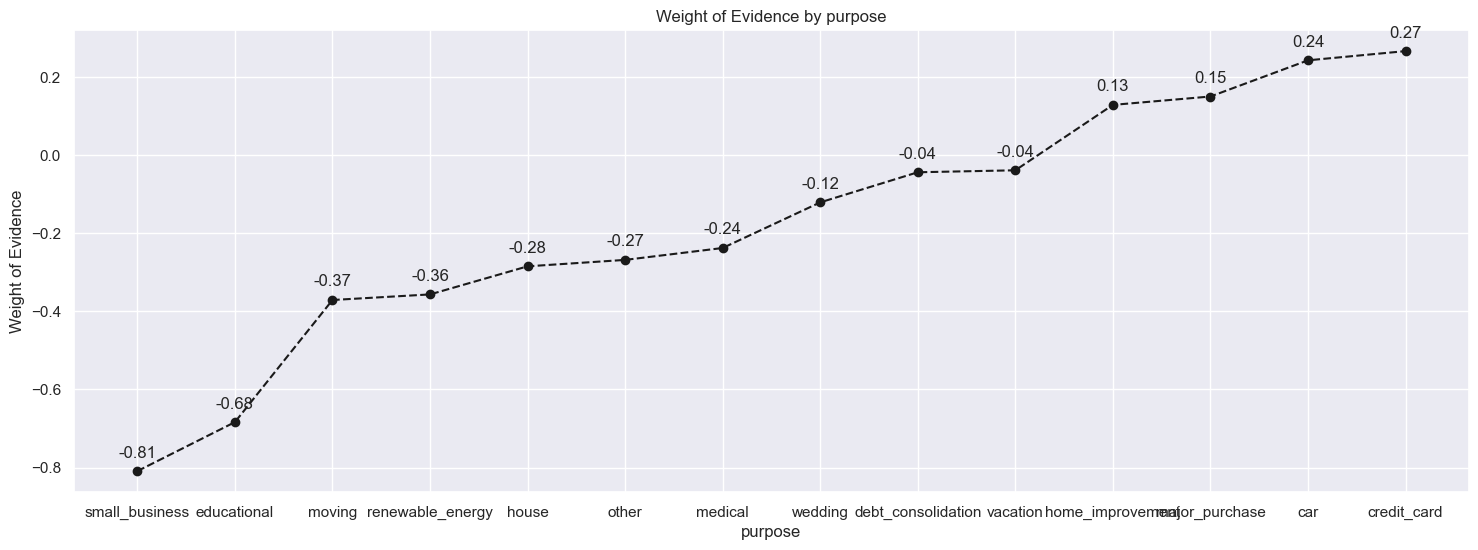

In [122]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [123]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [125]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242536,0.879577,0.650224,213329.0,29207.0,0.642207,0.715455,-0.108007,NaN,NaN,0.024689
1,w,130468,0.910967,0.349776,118852.0,11616.0,0.357793,0.284545,0.229061,0.03139,0.337068,0.024689


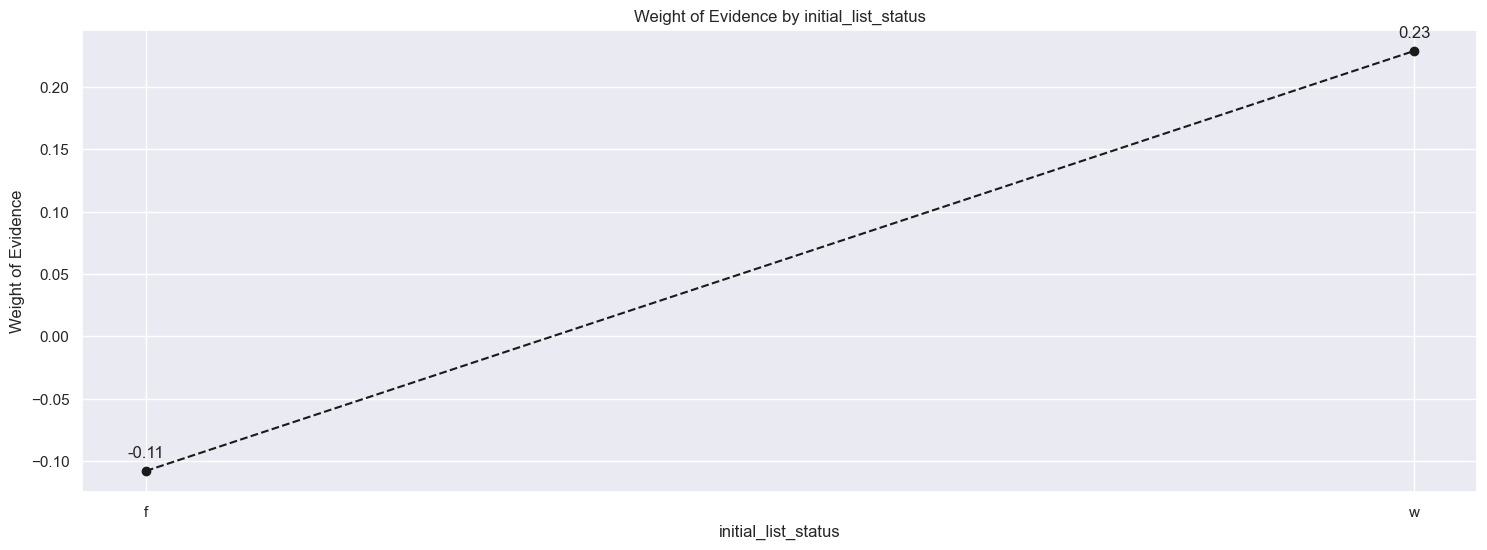

In [126]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [ ]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, OC_variabe_name, good_bad_variable_df):
    df = pd.concat([df[OC_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [127]:
df_inputs_prepr.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri